In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


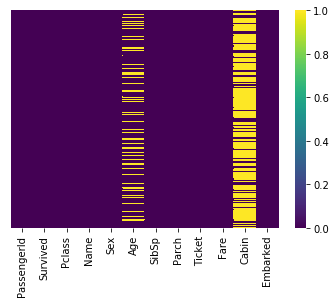

In [4]:
# create a heatmpa to see where are the missing data
sns.heatmap(train.isnull(), yticklabels=False, cmap='viridis')

In [5]:
sns.set_style('whitegrid')

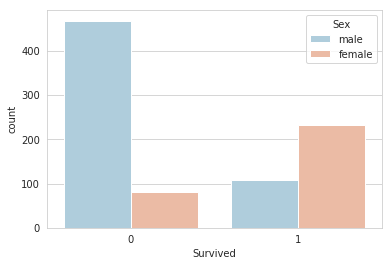

In [6]:
# see the ratio of actual target labels
sns.countplot(x='Survived', hue='Sex', data=train, palette='RdBu_r')

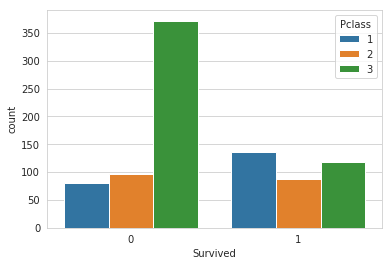

In [7]:
# the poor died
sns.countplot(x='Survived', hue='Pclass', data=train)

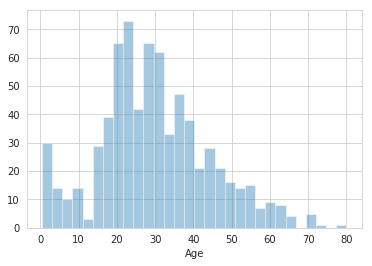

In [8]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

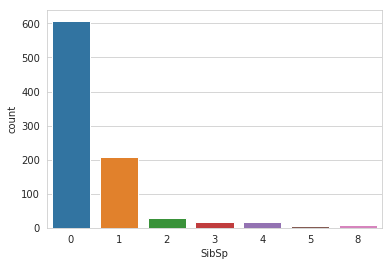

In [9]:
sns.countplot(x='SibSp', data=train)

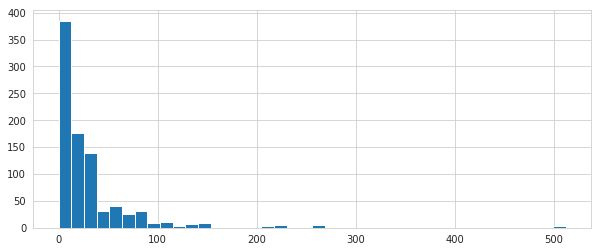

In [10]:
train['Fare'].hist(bins=40, figsize=(10,4))

In [11]:
import cufflinks as cf
cf.go_offline()

In [12]:
train['Fare'].iplot(kind='hist', bins=40)

# Fill and Clear Data

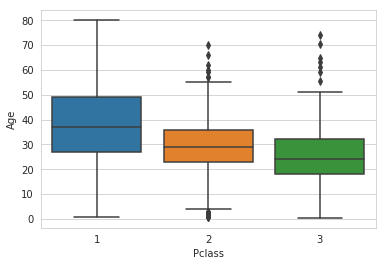

In [13]:
sns.boxplot(x='Pclass', y='Age', data=train)

In [14]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [15]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

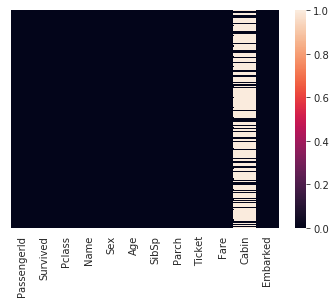

In [16]:
sns.heatmap(train.isnull(), yticklabels=False)

In [17]:
train.drop('Cabin', axis=1, inplace=True)

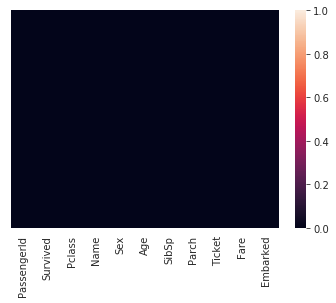

In [18]:
sns.heatmap(train.isnull(), yticklabels=False)

In [19]:
# 'Embarked' has some missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


In [20]:
# delete ALL THE FEATURES in the row with a NaN value
train.dropna(inplace=True)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


# Categorical Features

**Convert categorical variables into dummy (or indicator) variables**

In [21]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [22]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [23]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [24]:
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [25]:
train = pd.concat([train, sex, embark], axis=1)

In [29]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

# Train model

In [34]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [39]:
from sklearn.linear_model import LogisticRegression

In [40]:
logmodel = LogisticRegression()

In [46]:
logmodel.fit(X_train, y_train)

/home/kaml/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
predictions = logmodel.predict(X_test)

# Classification Report

In [48]:
from sklearn.metrics import classification_report

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86       163
           1       0.85      0.65      0.74       104

   micro avg       0.82      0.82      0.82       267
   macro avg       0.83      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267



In [50]:
from sklearn.metrics import confusion_matrix

In [52]:
confusion_matrix(y_test, predictions)

array([[151,  12],
       [ 36,  68]])